# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Iris dataset yang dapat diakses pada kaggle atau melalui link berikut https://www.kaggle.com/datasets/vikrishnan/iris-dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../penguins_raw.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# **4. Exploratory Data Analysis (EDA)**

Strategi EDA:
1. Assesing data
2. Analisis Univariate
3. Analisis Bivariate (berdasarkan fitur/kolom target "Species")
4. Analisis Multivariate (berdasarkan fitur/kolom target "Species")

## Assesing data

### Melihat informasi jumlah data non-null dan tipe data tiap kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Melihat statistik dataset

In [4]:
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### Melihat data unik tiap fitur/kolom

In [5]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

### Melihat missing value tiap fitur/kolom

In [6]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Melihat data duplikat

In [7]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Melihat outlier

In [8]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

outliers_dict = {}
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

for col, values in outliers_dict.items():
    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {len(values)}")
    print(f"Contoh nilai outlier: {values.values[:5]}")
    print("-" * 40)

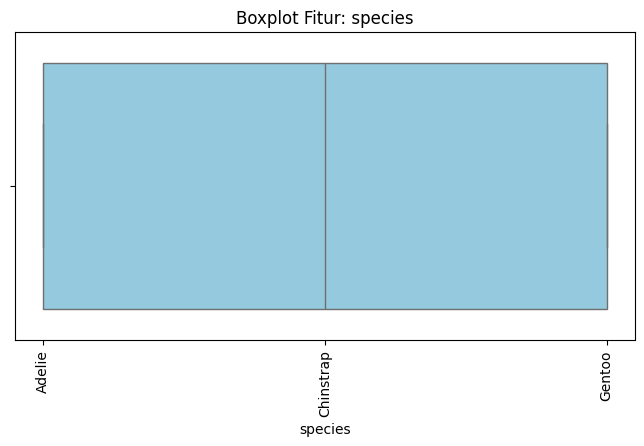

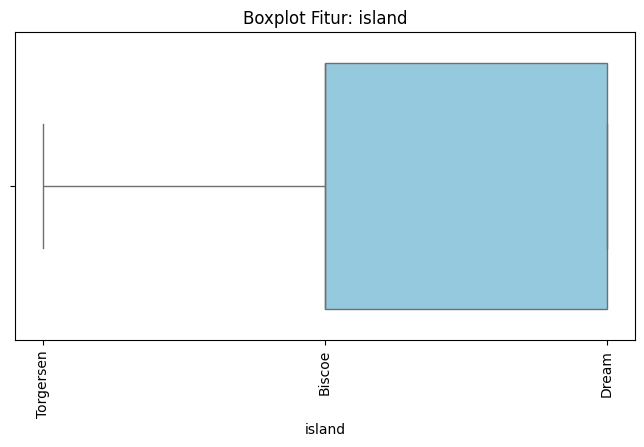

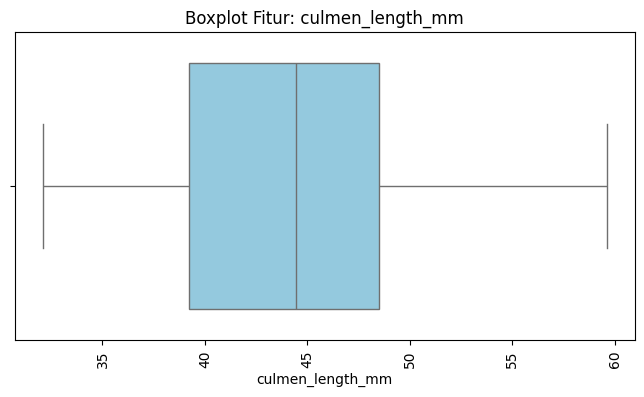

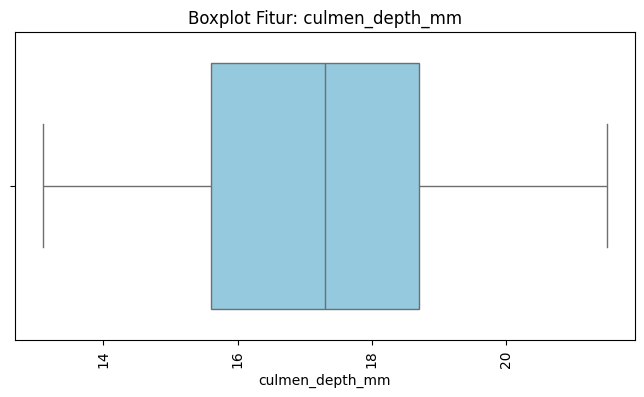

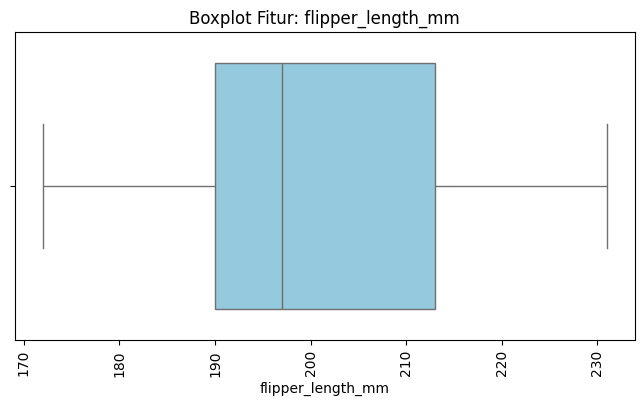

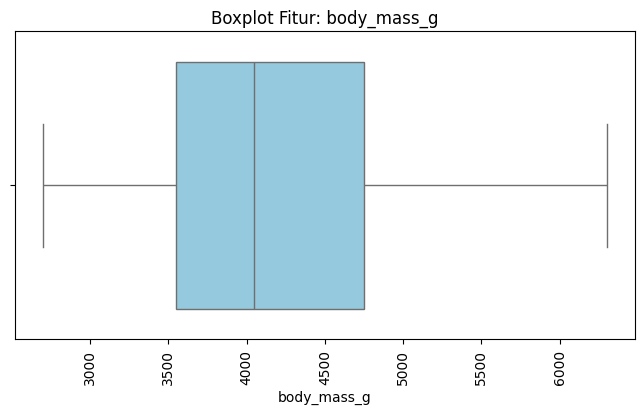

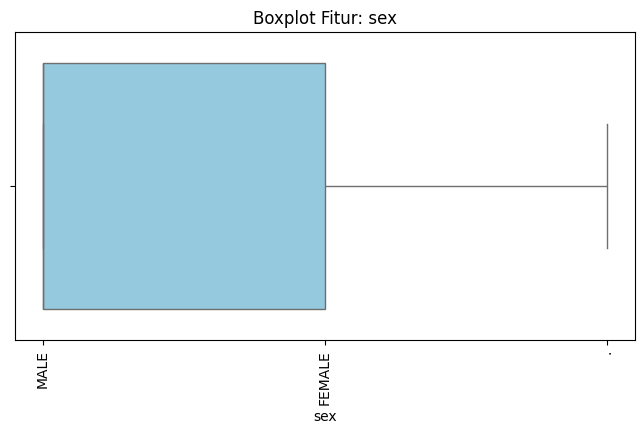

In [9]:
features = df.columns.tolist()

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot Fitur: {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

### Kesimpulan assesing data

1. Proyek ini menggunakan dataset iris yang diambil dari kaggle berisi 344 baris data dan 7 fitur/kolom
2. Penjabaran tiap fitur/kolom:
   - species: species dari pinguin, object
    - island: pulau tempat pinguin hidup, object
    - culmen_length_mm: panjang culmen, float
    - culmen_depth_mm: lebar culmen, float
    - flipper_length_mm: panjang flipper, float
    - body_mass_g: berat badan, float
    - sex: jenis kelamin, object
3. berdasarkan pengamatan jumlah data unik dataset tidak menunjukan adanya kejanggalan
4. terdapat data yang hilang atau tidak terisi pada fitur/kolom culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex
5. tidak terdapat data duplikat
6. tidak terdapat outlier

## Analisis Univariate

### Membuat pivot tabel dan visualisasi

Distribusi untuk fitur: species
           jumlah sampel  persentase (%)
species                                 
Adelie               152            44.2
Chinstrap             68            19.8
Gentoo               124            36.0


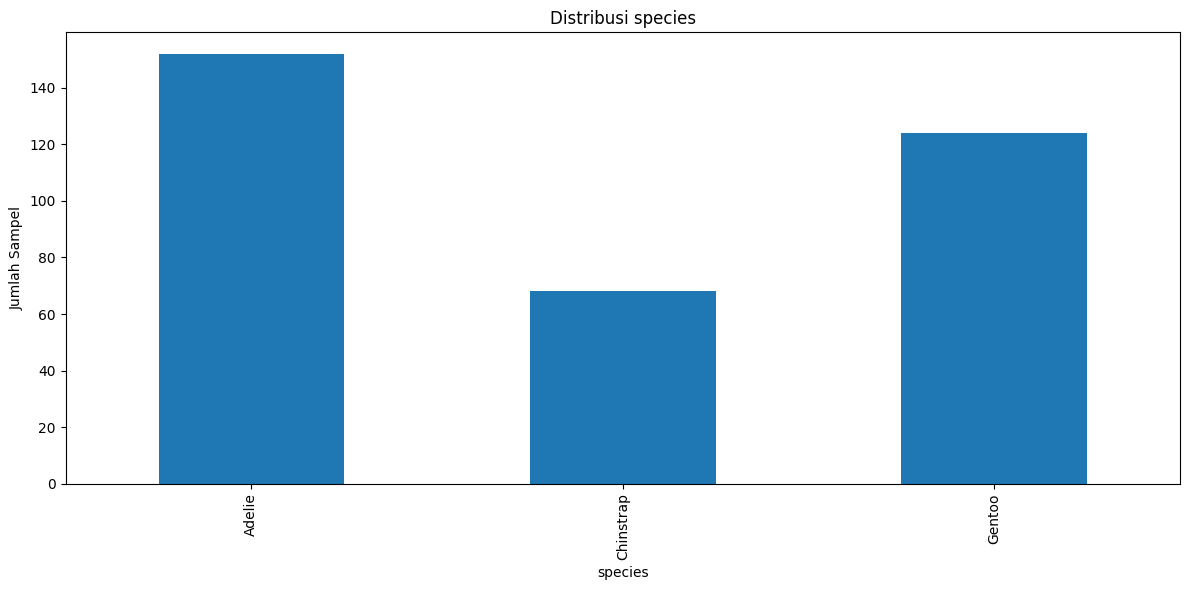



Distribusi untuk fitur: island
           jumlah sampel  persentase (%)
island                                  
Biscoe               168            48.8
Dream                124            36.0
Torgersen             52            15.1


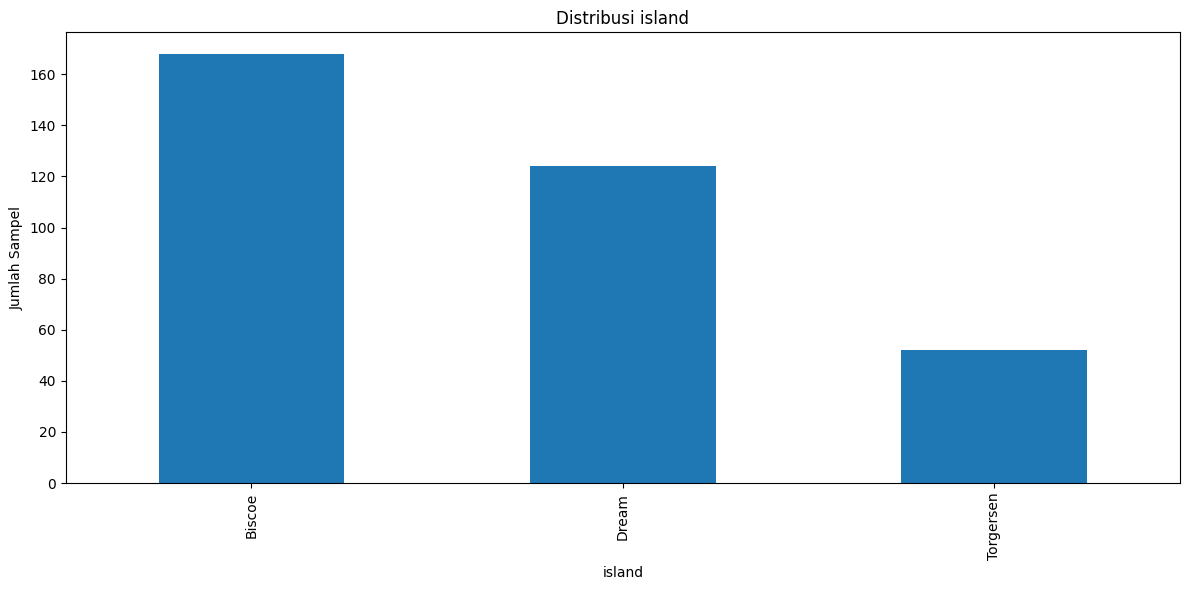



Distribusi untuk fitur: culmen_length_mm
                  jumlah sampel  persentase (%)
culmen_length_mm                               
32.1                          1             0.3
33.1                          1             0.3
33.5                          1             0.3
34.0                          1             0.3
34.1                          1             0.3
...                         ...             ...
55.1                          1             0.3
55.8                          1             0.3
55.9                          1             0.3
58.0                          1             0.3
59.6                          1             0.3

[164 rows x 2 columns]


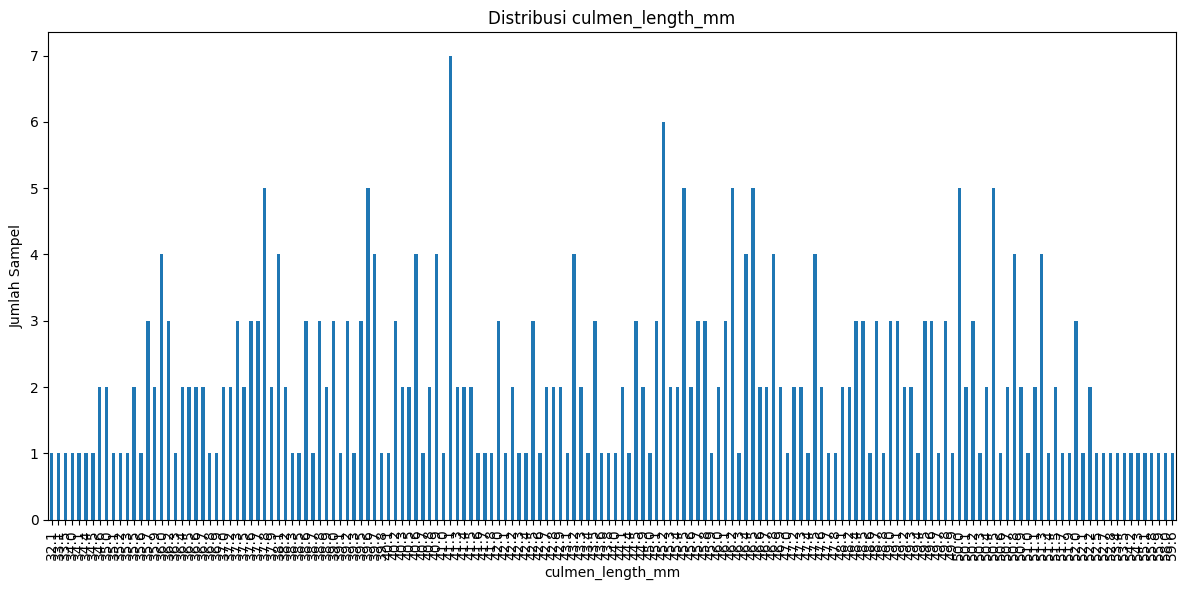



Distribusi untuk fitur: culmen_depth_mm
                 jumlah sampel  persentase (%)
culmen_depth_mm                               
13.1                         1             0.3
13.2                         1             0.3
13.3                         1             0.3
13.4                         1             0.3
13.5                         2             0.6
...                        ...             ...
20.7                         3             0.9
20.8                         1             0.3
21.1                         3             0.9
21.2                         2             0.6
21.5                         1             0.3

[80 rows x 2 columns]


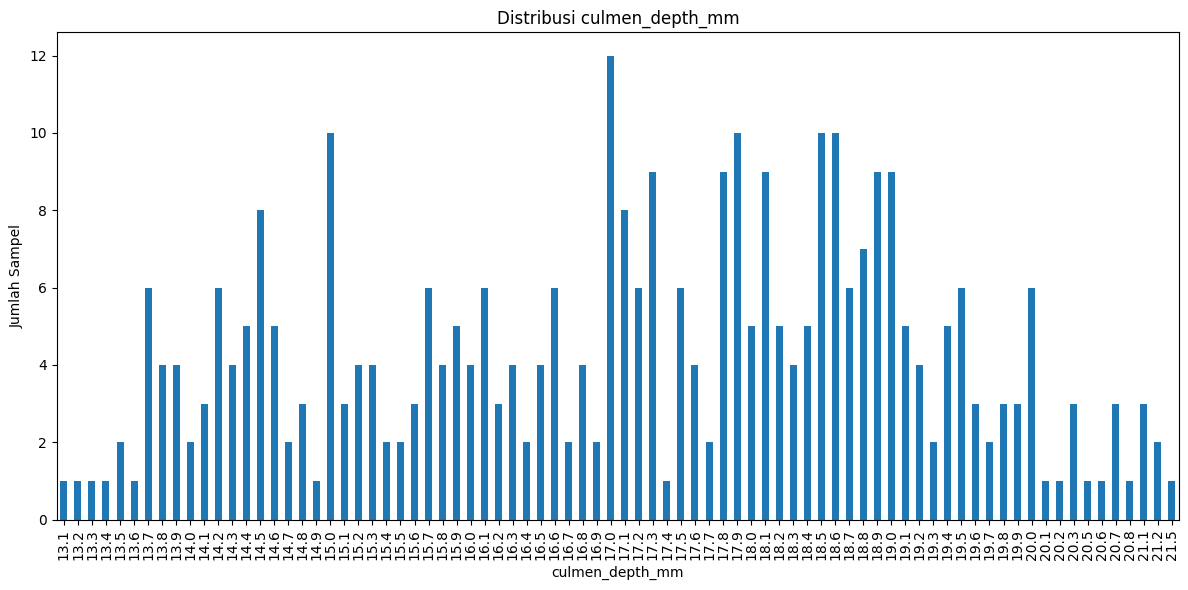



Distribusi untuk fitur: flipper_length_mm
                   jumlah sampel  persentase (%)
flipper_length_mm                               
172.0                          1             0.3
174.0                          1             0.3
176.0                          1             0.3
178.0                          4             1.2
179.0                          1             0.3
180.0                          5             1.5
181.0                          7             2.0
182.0                          3             0.9
183.0                          2             0.6
184.0                          7             2.0
185.0                          9             2.6
186.0                          7             2.0
187.0                         16             4.7
188.0                          6             1.8
189.0                          7             2.0
190.0                         22             6.4
191.0                         13             3.8
192.0                    

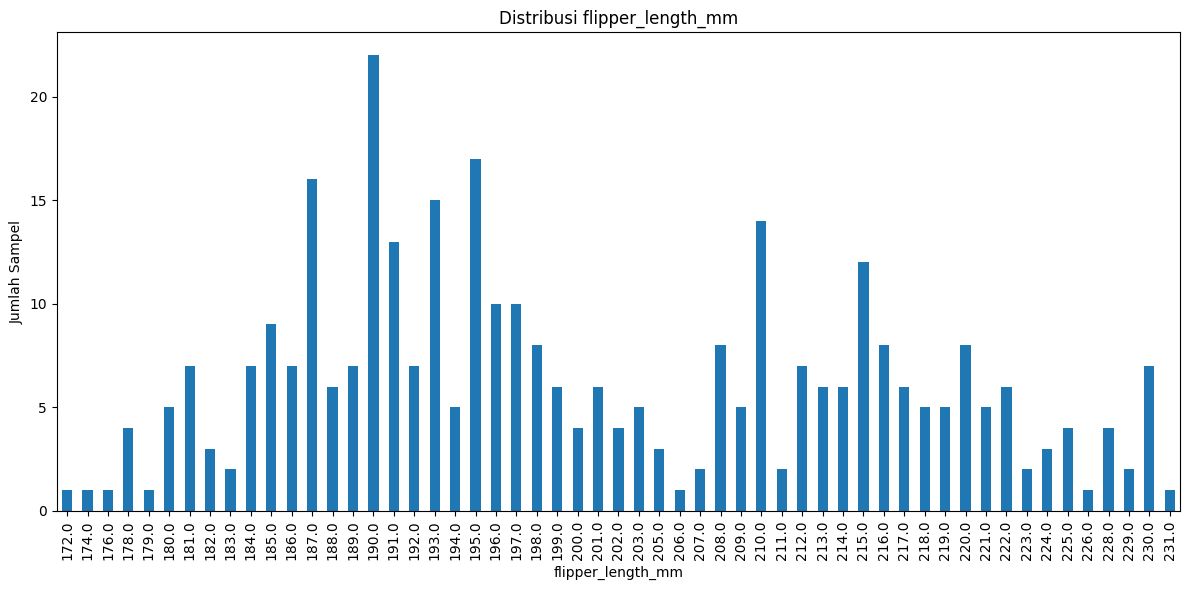



Distribusi untuk fitur: body_mass_g
             jumlah sampel  persentase (%)
body_mass_g                               
2700.0                   1             0.3
2850.0                   2             0.6
2900.0                   4             1.2
2925.0                   1             0.3
2975.0                   1             0.3
...                    ...             ...
5850.0                   3             0.9
5950.0                   2             0.6
6000.0                   2             0.6
6050.0                   1             0.3
6300.0                   1             0.3

[94 rows x 2 columns]


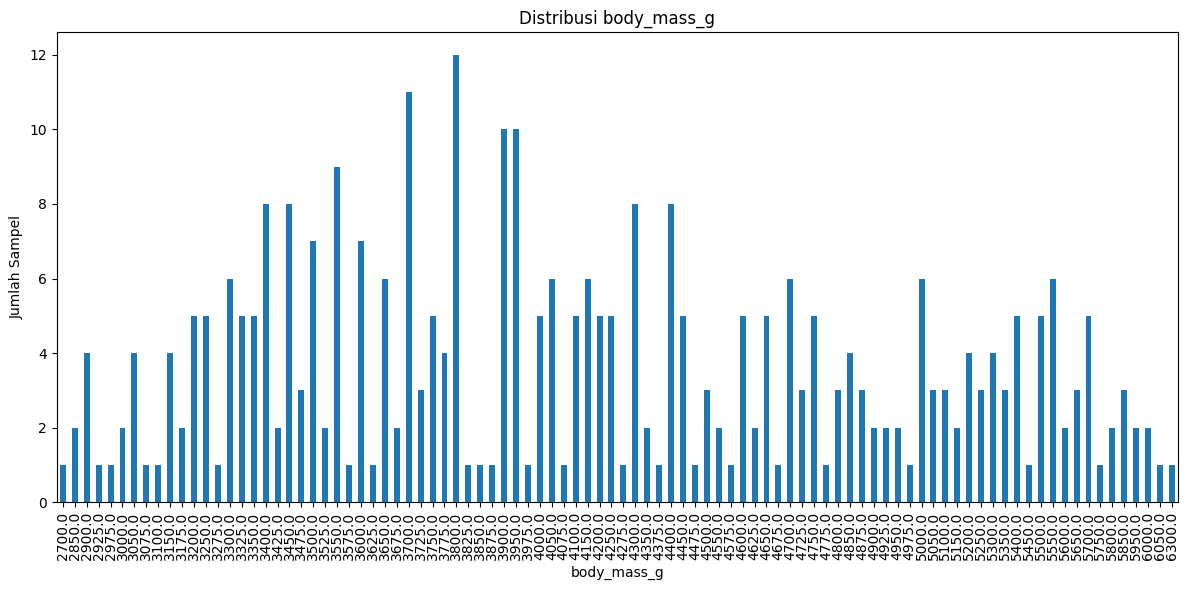



Distribusi untuk fitur: sex
        jumlah sampel  persentase (%)
sex                                  
.                   1             0.3
FEMALE            165            49.4
MALE              168            50.3


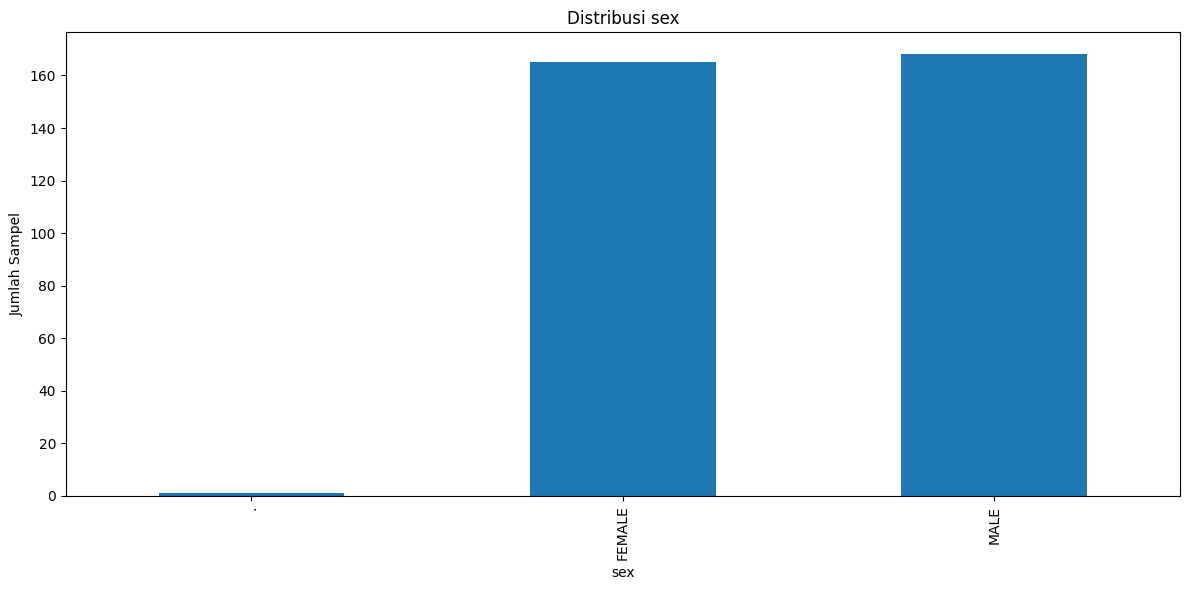

In [10]:
features = df.select_dtypes(include=['int64', 'float64', 'object']).columns.tolist()

for col in features:
    count = df[col].value_counts().sort_index()
    percent = 100 * df[col].value_counts(normalize=True).sort_index()

    pivot = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})

    print(f"Distribusi untuk fitur: {col}")
    print(pivot)

    plt.figure(figsize=(12, 6))
    count.plot(kind='bar', title=f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print("\n")

### Kesimpulan analisis univariate

1. species: Dataset didominasi oleh spesies Adelie, diikuti Gentoo dan Chinstrap.
2. island: Sebagian besar penguin berasal dari Biscoe, dengan distribusi yang tidak merata antar pulau.
3. culmen_length_mm: Variasi panjang paruh sangat beragam, menunjukkan distribusi yang tersebar tanpa konsentrasi nilai tertentu.
4. culmen_depth_mm: Kedalaman paruh juga bervariasi, tetapi sedikit lebih terkonsentrasi dibanding panjang paruh
5. flipper_length_mm: Ada kecenderungan panjang sirip berada di sekitar 190 mm, dengan variasi ke kedua sisi.
6. body_mass_g: Distribusi massa tubuh cukup beragam tanpa pola yang jelas, tetapi cenderung tersebar di rentang menengah (misalnya 3000–5000 g)
7. sex: Dataset seimbang secara gender, tetapi terdapat sedikit noise (data tidak valid)

## Analisis Bivariate

### Membuat pivot tabel dan visualisasi

Pivot Table: Distribusi Species berdasarkan 'island'


species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


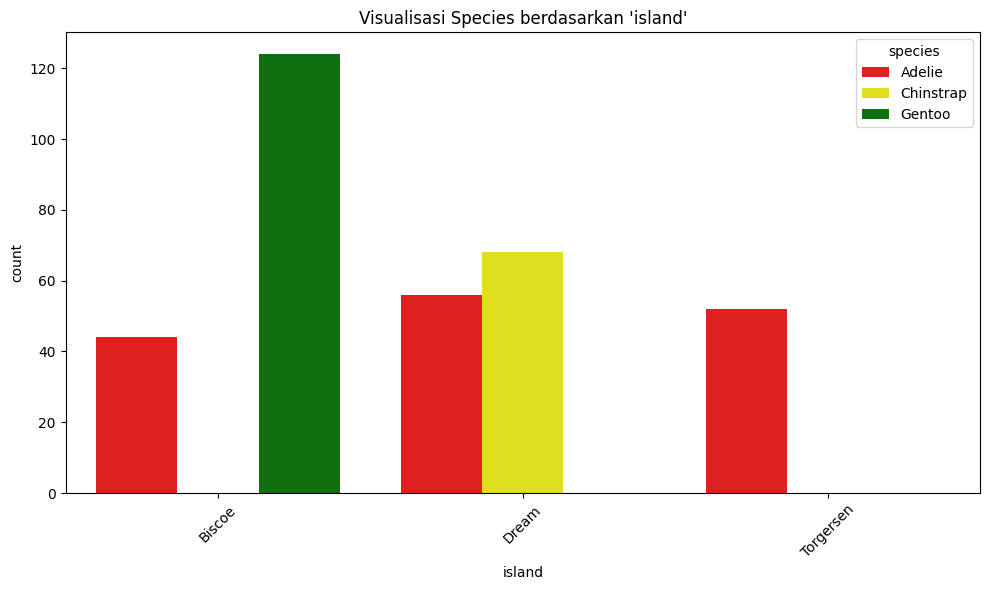



Pivot Table: Distribusi Species berdasarkan 'culmen_length_mm'


species,Adelie,Chinstrap,Gentoo
culmen_length_mm,,,
32.1,1,0,0
33.1,1,0,0
33.5,1,0,0
34.0,1,0,0
34.1,1,0,0
...,...,...,...
55.1,0,0,1
55.8,0,1,0
55.9,0,0,1


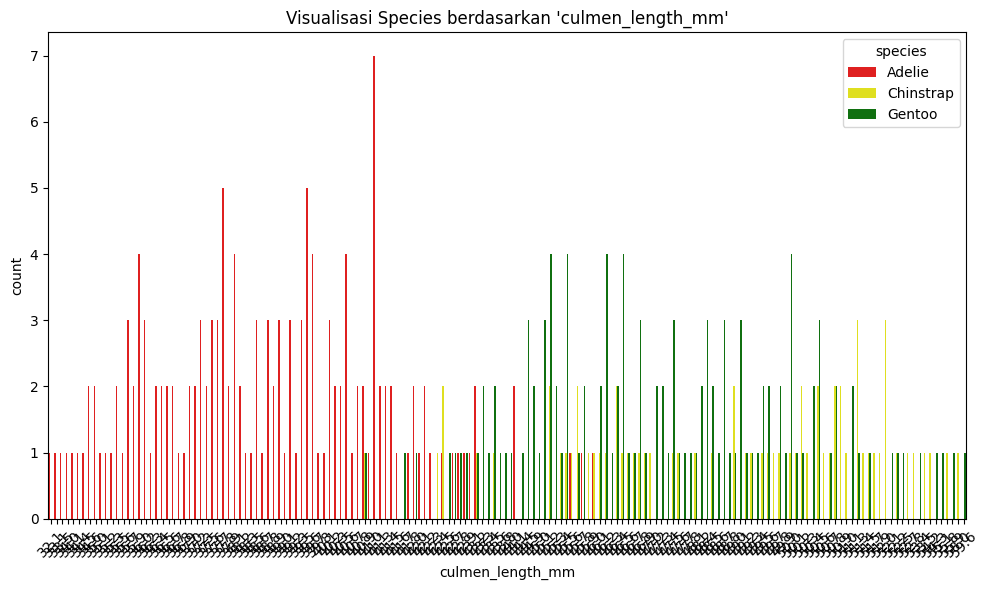



Pivot Table: Distribusi Species berdasarkan 'culmen_depth_mm'


species,Adelie,Chinstrap,Gentoo
culmen_depth_mm,,,
13.1,0,0,1
13.2,0,0,1
13.3,0,0,1
13.4,0,0,1
13.5,0,0,2
...,...,...,...
20.7,2,1,0
20.8,0,1,0
21.1,3,0,0


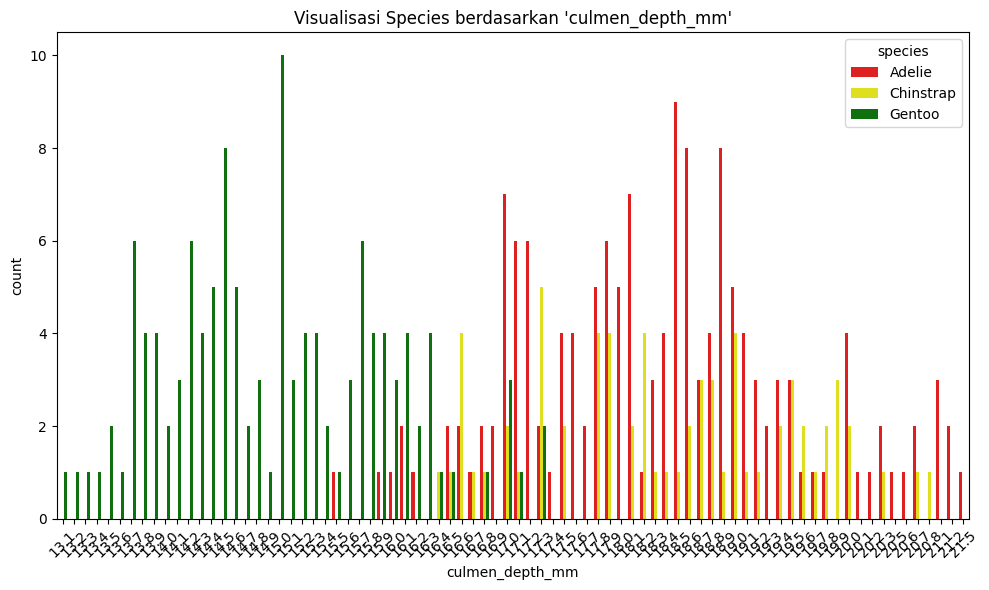



Pivot Table: Distribusi Species berdasarkan 'flipper_length_mm'


species,Adelie,Chinstrap,Gentoo
flipper_length_mm,,,
172.0,1,0,0
174.0,1,0,0
176.0,1,0,0
178.0,3,1,0
179.0,1,0,0
180.0,5,0,0
181.0,5,2,0
182.0,3,0,0
183.0,2,0,0


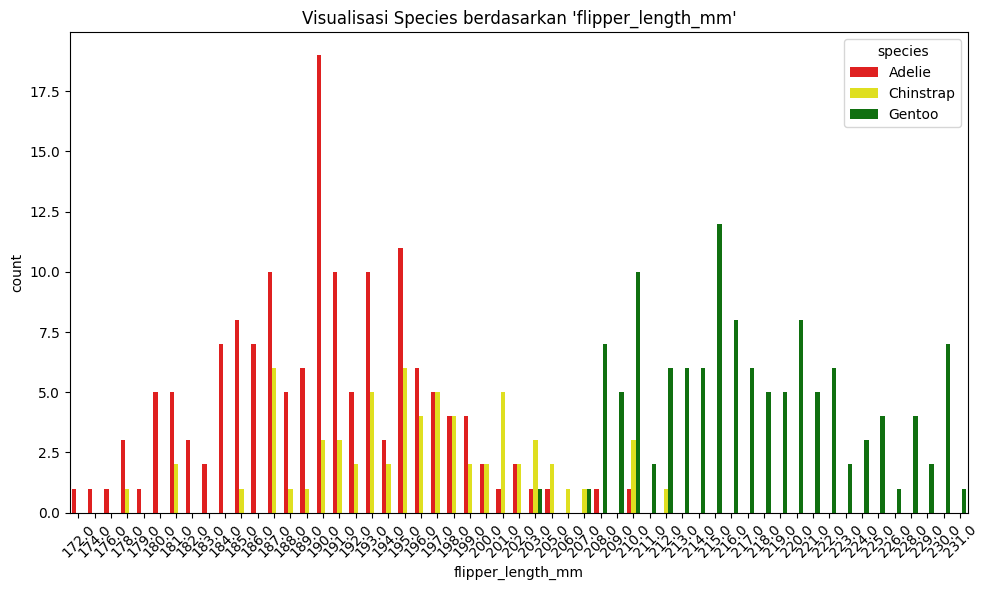



Pivot Table: Distribusi Species berdasarkan 'body_mass_g'


species,Adelie,Chinstrap,Gentoo
body_mass_g,,,
2700.0,0,1,0
2850.0,2,0,0
2900.0,3,1,0
2925.0,1,0,0
2975.0,1,0,0
...,...,...,...
5850.0,0,0,3
5950.0,0,0,2
6000.0,0,0,2


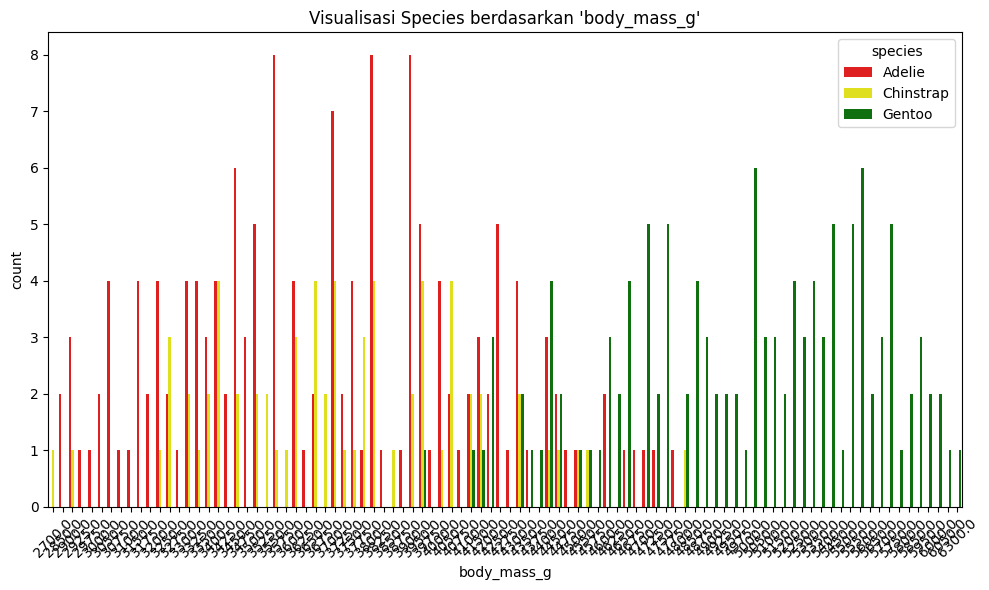



Pivot Table: Distribusi Species berdasarkan 'sex'


species,Adelie,Chinstrap,Gentoo
sex,,,
.,0,0,1
FEMALE,73,34,58
MALE,73,34,61


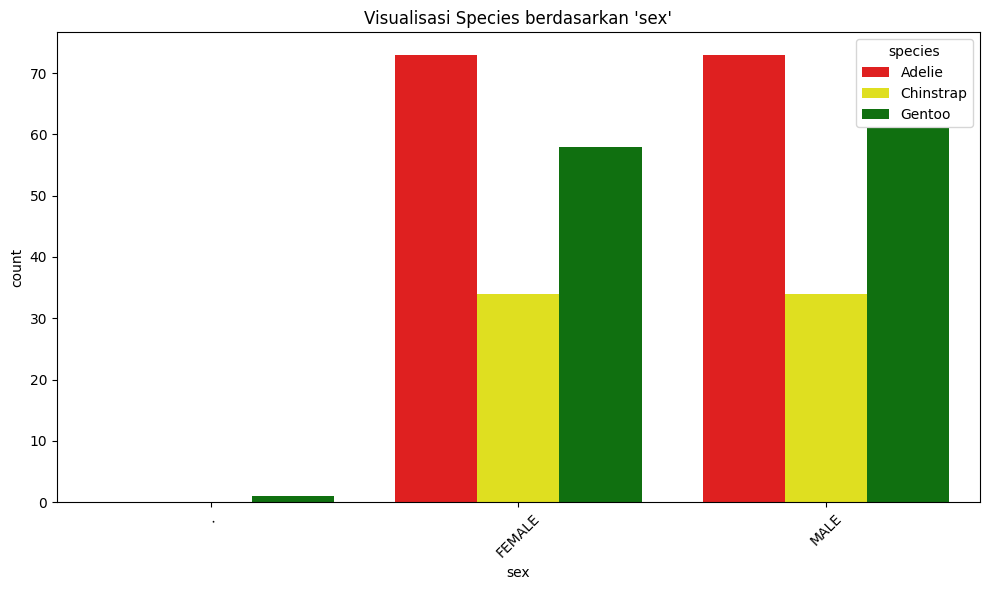

In [11]:
features.remove('species')

species_order = ["Adelie", "Chinstrap", "Gentoo"]

species_palette = {"Adelie": "red", "Chinstrap": "yellow", "Gentoo": "green"}

for col in features:
    pivot = (
        df
        .groupby([col, "species"])
        .size()
        .unstack(fill_value=0)
    )

    print(f"Pivot Table: Distribusi Species berdasarkan '{col}'")
    display(pivot)

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df,
        x=col,
        hue="species",
        order=sorted(df[col].dropna().unique()),
        hue_order=species_order,
        palette=species_palette
    )
    plt.title(f"Visualisasi Species berdasarkan '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

### Kesimpulan analisis bivariate

1. Spesies terdistribusi secara eksklusif per pulau, kecuali Adelie yang ada di semua pulau. Dream adalah satu-satunya pulau dengan Chinstrap, sementara Gentoo hanya di Biscoe. Torgersen hanya dihuni Adelie.
2. Gentoo cenderung memiliki paruh lebih panjang daripada Adelie dan Chinstrap.Adelie memiliki paruh paling pendek.Distribusi panjang paruh bisa menjadi pembeda antar-spesies.
3. Adelie memiliki paruh lebih dalam dibandingkan lainnya.Gentoo memiliki paruh paling tipis. Fitur ini sangat berguna untuk membedakan spesies.
4. Gentoo memiliki sirip signifikan lebih panjang daripada dua spesies lain.Adelie memiliki sirip terpendek.Panjang sirip adalah pembeda kuat antar-spesies.
5. Gentoo secara konsisten lebih berat daripada Adelie dan Chinstrap.Adelie dan Chinstrap memiliki rentang massa yang tumpang tindih.
6. Distribusi gender seimbang untuk Adelie dan Chinstrap.Gentoo memiliki sedikit bias ke jantan.

## Analisis multivariate

In [12]:
df_multi = df.copy()

species_mapping = {
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}

df_multi['species'] = df_multi['species'].map(species_mapping)

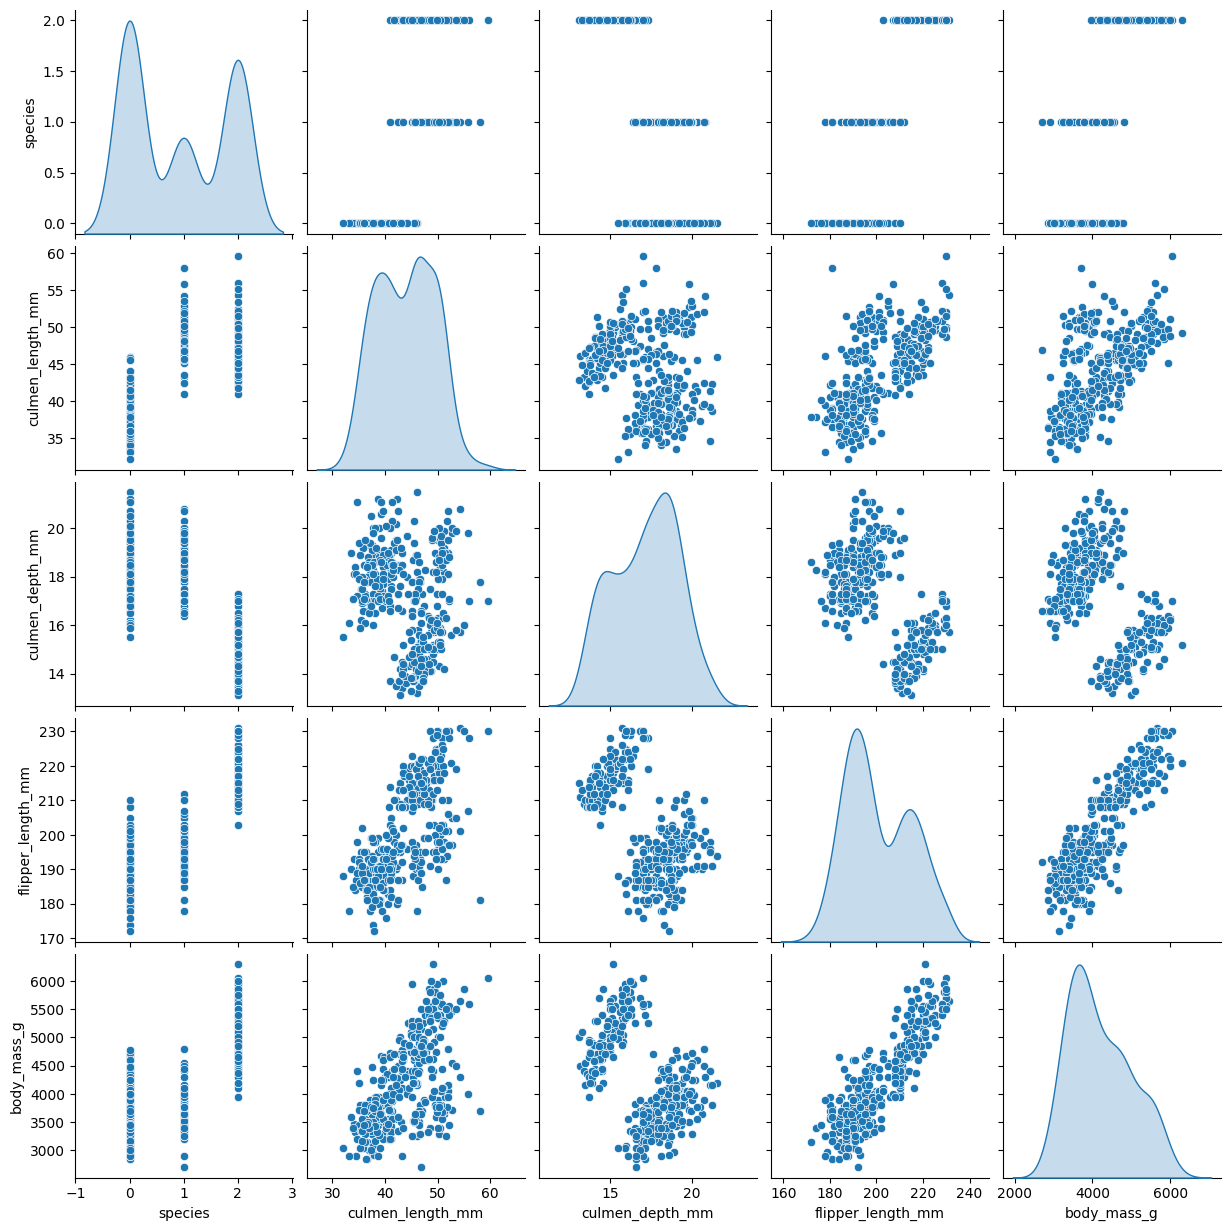

In [13]:
sns.pairplot(df_multi, diag_kind = 'kde')

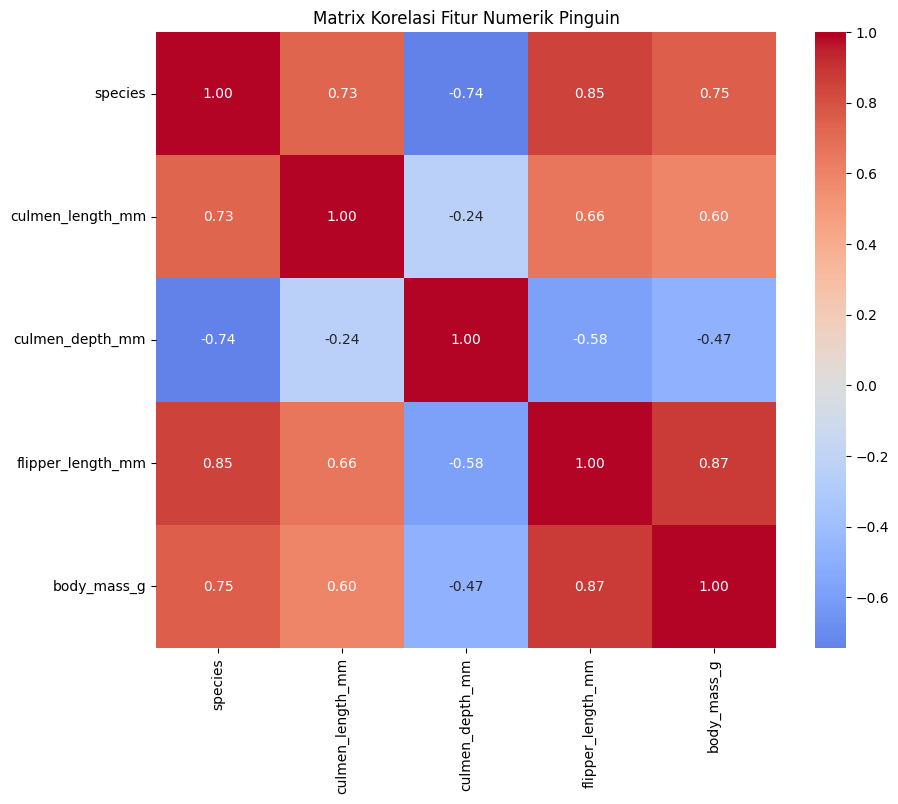

In [14]:
numeric_columns = df_multi.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df_multi[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matrix Korelasi Fitur Numerik Pinguin')
plt.show()

# **5. Data Preprocessing**

In [15]:
df1 = df.copy()

species_mapping = {
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
}

df1['species'] = df1['species'].map(species_mapping)

In [16]:
df2 = df1.copy()
df2 = df2.drop(columns=['island', 'sex'])

In [17]:
df3 = df2.copy()
df3 = df3.dropna()

In [18]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df4 = df3.copy()
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = MinMaxScaler()
df4[numeric_features] = scaler.fit_transform(df4[numeric_features])
print(df4.head())

   species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0        0          0.254545         0.666667           0.152542     0.291667
1        0          0.269091         0.511905           0.237288     0.305556
2        0          0.298182         0.583333           0.389831     0.152778
4        0          0.167273         0.738095           0.355932     0.208333
5        0          0.261818         0.892857           0.305085     0.263889


In [19]:
df4.isna().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [20]:
df4.to_csv('penguins_preprocessing.csv', index=False)

print("File penguins_preprocessing.csv berhasil disimpan!")

File penguins_preprocessing.csv berhasil disimpan!
